In [11]:

import pandas as pd
import sqlite3
import numpy as np
from pathlib import Path
from IPython.display import display
from IPython.core.display import HTML
import seaborn as sns

from analysis_tools import convert_Chase_ZScore_logs_avg
# Connect to the FellPace Database
db_file = "C:\\PythonProjects\\FellPace\\fellpace.db"
con = sqlite3.connect(db_file)


<Axes: xlabel='Result_ID', ylabel='Time'>

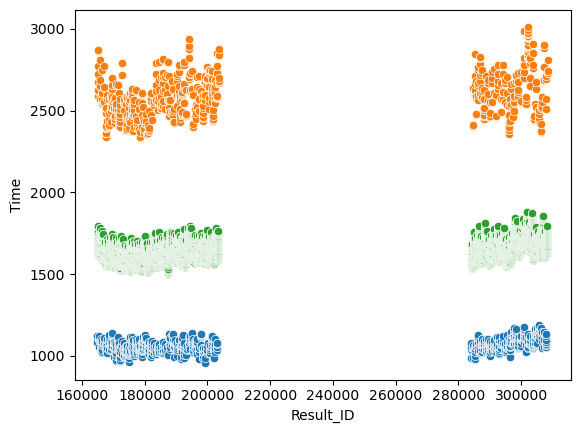

In [17]:
# Get the IDs of Hillsborough PR
Q = """
SELECT * FROM Results
WHERE Race_ID IN (
SELECT Race_ID FROM Races
WHERE Series_ID IN (
SELECT Series_ID FROM Race_Series
WHERE Series_Name LIKE "%Endcliffe%"
)
)
"""

results = pd.read_sql(Q,con)
data = results.loc[(results['ZScore_log'] > -2.5) & (results['ZScore_log'] <= -2.0) ]
data2 = results.loc[(results['ZScore_log'] > 2.0) & (results['ZScore_log'] <= 2.5) ]
data3 = results.loc[(results['ZScore_log'] > -0.25) & (results['ZScore_log'] <= 0.25) ]

sns.scatterplot(data = data, x = 'Result_ID',y='Time')
sns.scatterplot(data = data2, x = 'Result_ID',y='Time')
sns.scatterplot(data = data3, x = 'Result_ID',y='Time')
